# Creating Fucntions
We are creating two functions that can capture the number of warehouses within 1/4, 1/2, and 1 mile using address.

## Import the Libraries

In [1]:
# to manipulate data
import pandas as pd

# for spatial data
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt

# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

# for basemaps
import contextily as ctx

# for interactive webmaps
import folium

# The number of warehouses within 1 mile
This is a simple one. We are using building data from open street map. 

## Define an area of interest

Define an address and download the data from OSM first.

In [2]:
address = 'Ontario International Airport, Vineyard Avenue, Racimo, Ontario, San Bernardino County, California, 91761, United States'

In [3]:
%%time
# %%time is a magic command to see how long it takes this cell to run 

# get the data from OSM that are tagged as 'building' for a 1609.34m X 1609.34m (1 mile x 1 mile) square area
osm = ox.geometries_from_address(address,tags={'building':True},dist=1609.34)

CPU times: user 79.8 ms, sys: 10.1 ms, total: 89.9 ms
Wall time: 114 ms


In [4]:
# show me 4 random rows
osm.sample(5)

addr:city addr:housenumber addr:state addr:street  \
element_type osmid                                                          
way          1110047306       NaN              NaN        NaN         NaN   
             25425662         NaN              NaN        NaN         NaN   
             25442795         NaN              NaN        NaN         NaN   
             336926356        NaN              NaN        NaN         NaN   
             37026155         NaN              NaN        NaN         NaN   

                        addr:street_direction_prefix  \
element_type osmid                                     
way          1110047306                          NaN   
             25425662                            NaN   
             25442795                            NaN   
             336926356                           NaN   
             37026155                            NaN   

                                               source source_ref  \
element_type osmid                                                 
way          1110047306  microsoft/BuildingFootprints        NaN   
             25425662                             NaN        NaN   
             25442795                             NaN        NaN   
             336926356                           USGS        NaN   
             37026155                             NaN        NaN   

                                                                  geometry  \
element_type osmid                                                           
way          1110047306  POLYGON ((-117.59851 34.04310, -117.59843 34.0...   
             25425662    POLYGON ((-117.60971 34.05881, -117.61067 34.0...   
             25442795    POLYGON ((-117.60419 34.05275, -117.60382 34.0...   
             336926356   POLYGON ((-117.58759 34.04174, -117.58608 34.0...   
             37026155    POLYGON ((-117.60908 34.04086, -117.60908 34.0...   

                                     name aeroway  ... website fixme note  \
element_type osmid                                 ...                      
way          1110047306               NaN     NaN  ...     NaN   NaN  NaN   
             25425662    "Old" terminal 1     NaN  ...     NaN   NaN  NaN   
             25442795                 NaN     NaN  ...     NaN   NaN  NaN   
             336926356                NaN     NaN  ...     NaN   NaN  NaN   
             37026155                 NaN     NaN  ...     NaN   NaN  NaN   

                        addr:country cuisine takeaway alt_name drive_through  \
element_type osmid                                                             
way          1110047306          NaN     NaN      NaN      NaN           NaN   
             25425662            NaN     NaN      NaN      NaN           NaN   
             25442795            NaN     NaN      NaN      NaN           NaN   
             336926356           NaN     NaN      NaN      NaN           NaN   
             37026155            NaN     NaN      NaN      NaN           NaN   

                        ways type  
element_type osmid                 
way          1110047306  NaN  NaN  
             25425662    NaN  NaN  
             25442795    NaN  NaN  
             336926356   NaN  NaN  
             37026155    NaN  NaN  

[5 rows x 45 columns]

This is the building data within 1 mile centering from the airport 

## Eliminate unnecessary columns
There are too much data we don't need. Just subset the data we need.

In [5]:
# Show the info of the data
osm.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 137 entries, ('way', 25421022) to ('relation', 15511540)
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   addr:city                     24 non-null     object  
 1   addr:housenumber              23 non-null     object  
 2   addr:state                    24 non-null     object  
 3   addr:street                   23 non-null     object  
 4   addr:street_direction_prefix  7 non-null      object  
 5   source                        53 non-null     object  
 6   source_ref                    10 non-null     object  
 7   geometry                      137 non-null    geometry
 8   name                          22 non-null     object  
 9   aeroway                       4 non-null      object  
 10  ref                           3 non-null      object  
 11  nodes                         137 non-null    object  
 12  addr:po

In [6]:
# subset it
columns_to_keep = ['geometry','building']
osm = osm[columns_to_keep]
osm.head(5)

geometry  \
element_type osmid                                                         
way          25421022  POLYGON ((-117.58822 34.06063, -117.58800 34.0...   
             25421169  POLYGON ((-117.61164 34.05181, -117.61111 34.0...   
             25421170  POLYGON ((-117.61214 34.05152, -117.61166 34.0...   
             25425661  POLYGON ((-117.60647 34.06173, -117.60639 34.0...   
             25425662  POLYGON ((-117.60971 34.05881, -117.61067 34.0...   

                      building  
element_type osmid              
way          25421022      yes  
             25421169      yes  
             25421170      yes  
             25425661      yes  
             25425662      yes

Now we have very clean data with ID, geometry, and building types. 

### Cleaning up unspecified building types

In [7]:
# Cleaning up unspecified building types
osm.loc[osm['building']=='yes','building'] = 'unspecified'
osm.head(5)

geometry  \
element_type osmid                                                         
way          25421022  POLYGON ((-117.58822 34.06063, -117.58800 34.0...   
             25421169  POLYGON ((-117.61164 34.05181, -117.61111 34.0...   
             25421170  POLYGON ((-117.61214 34.05152, -117.61166 34.0...   
             25425661  POLYGON ((-117.60647 34.06173, -117.60639 34.0...   
             25425662  POLYGON ((-117.60971 34.05881, -117.61067 34.0...   

                          building  
element_type osmid                  
way          25421022  unspecified  
             25421169  unspecified  
             25421170  unspecified  
             25425661  unspecified  
             25425662  unspecified

All 'yes' has been converted to 'unspecified'.

# Make a building type Map Plots

In [8]:
# Count the building types 
osm_building_counts = osm.value_counts(['building']).reset_index(name="count")
osm_building_counts

building  count
0  unspecified    114
1   industrial      9
2   commercial      7
3    warehouse      5
4      trailer      1
5   university      1

<AxesSubplot: >

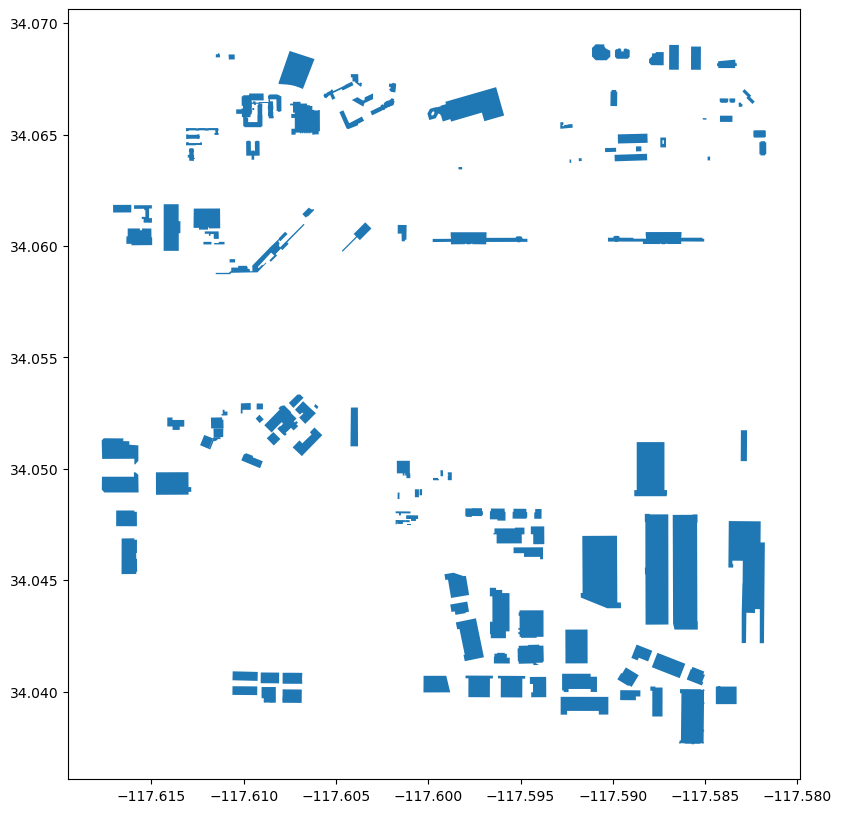

In [9]:
# plot entire dataset
osm.plot(figsize=(10,10))

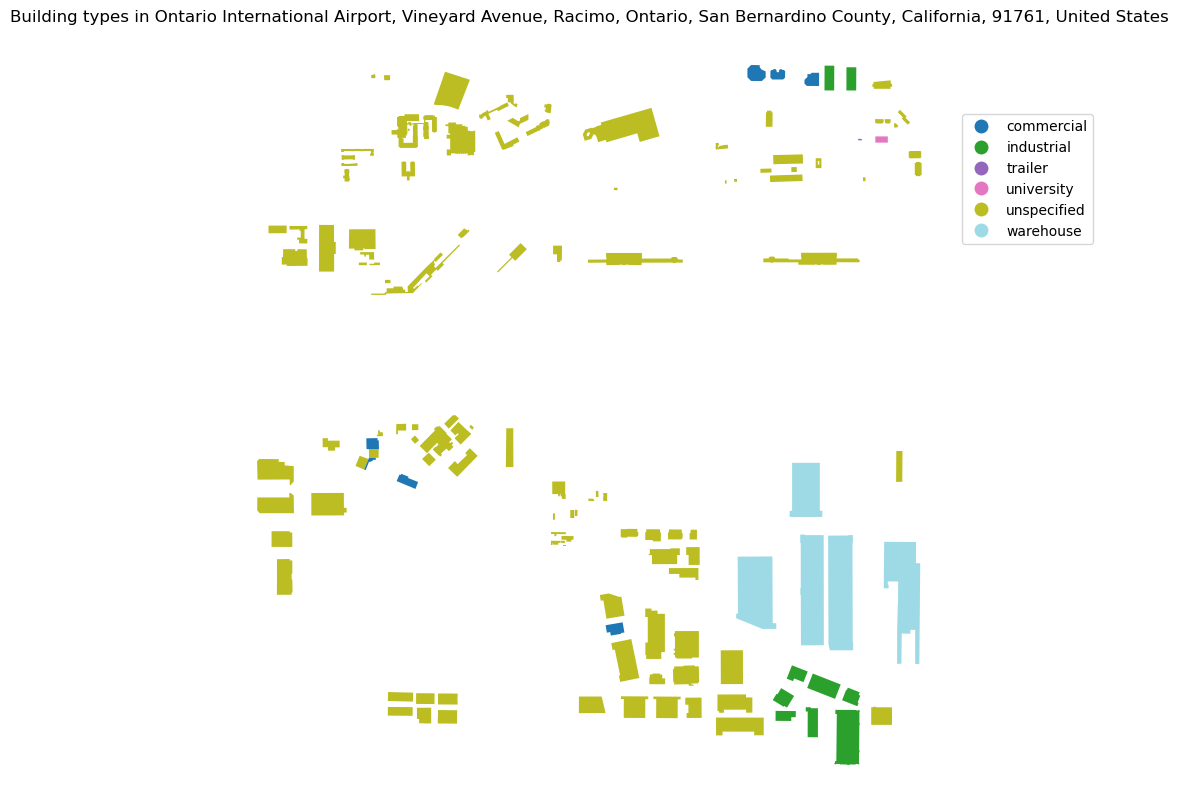

In [10]:
# Create the basic map
fig, ax = plt.subplots(figsize=(10,10))

# create the map plot
osm.plot(ax=ax,
         column='building',
         cmap='tab20',
         legend=True,
         legend_kwds={'loc':'upper left','bbox_to_anchor':(1,.9)})

# add a title
ax.set_title('Building types in ' + address)

# get rid of the axis
ax.axis('off');

### Calculate the map bounds of your data

In [11]:
# get min/max bounds of lat/lon
minx = osm.total_bounds[0]
miny = osm.total_bounds[1]
maxx = osm.total_bounds[2]
maxy = osm.total_bounds[3]

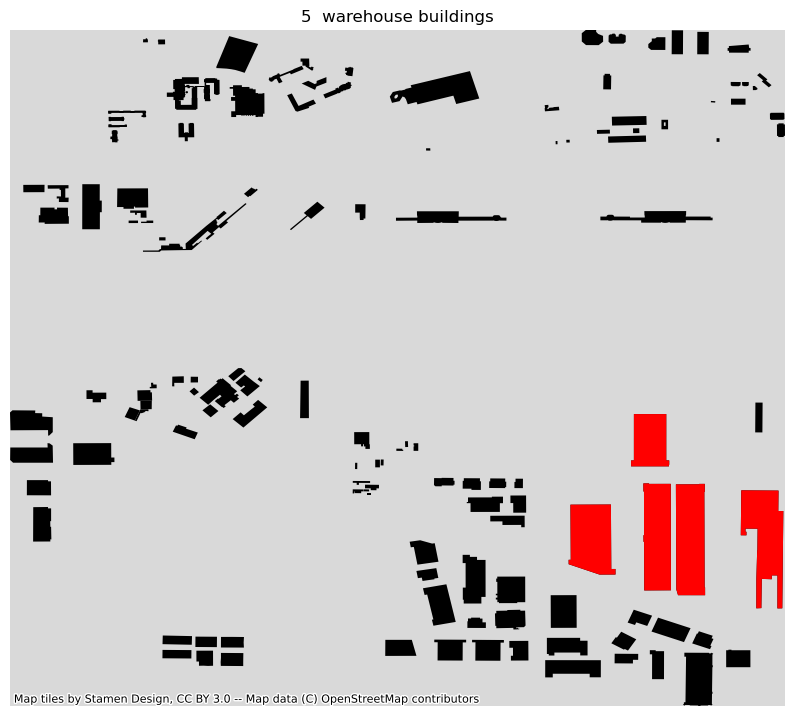

In [12]:
# reproject to Web Mercator
osm_web_mercator = osm.to_crs(epsg=3857)
# Able to measure distance in meter

fig, ax = plt.subplots(figsize=(10,10))

# create the map plot with all buildings in black
osm.plot(ax=ax,
            # column='building',
        color='black',
        legend=True)

# create the map plot with only warehouse buildings and in red
osm[osm['building'] == 'warehouse'].plot(ax=ax,
        # column='building',
        color='red',
        legend=True)

# set the extent of the map 
# so that each map has the same bounds
ax.set_xlim((minx,maxx))
ax.set_ylim((miny,maxy))

# add a title
number_of_buildings = len(osm[osm['building']=='warehouse'])
ax.set_title(str(number_of_buildings) + '  warehouse buildings')

# get rid of the axis
ax.axis('off');

# basemap from carto that has a dark background (easier to see)
ctx.add_basemap(ax=ax,
                source=ctx.providers.Stamen.TonerLite,
                alpha=1, # add transparency to make it less dominant
                zoom=14
                )



For some reasons, the basemap and legend are not showing 

## Create a function that generates a map based on any location

In [13]:
# function to create a map using open street map
def make_building_map(address):
 
    # get the data from osm
    osm = ox.geometries_from_address(address,
                                     tags={'building':True},
                                     dist=1609.34)
    
    
    # create the figure as a subplot
    fig,ax = plt.subplots(figsize=(8,8))
    
    # create the map plot with all buildings in black
    osm.plot(ax=ax,
                # column='building',
             color='black',
             legend=True)

    # create the map plot with only warehouse buildings and in red
    osm[osm['building'] == 'warehouse'].plot(ax=ax,
            # column='building',
            color='red',
            legend=True)

    # add a title
    number_of_buildings = len(osm[osm['building']=='warehouse'])
    ax.set_title(str(number_of_buildings) + '   warehouse buildings within 1 mile')

    # get rid of the axis
    ax.axis('off')  
    
    # basemap from carto that has a dark background (easier to see)
    ctx.add_basemap(ax=ax,
                source=ctx.providers.CartoDB.Positron,
                alpha=1, # add transparency to make it less dominant
                zoom=14
                )

/opt/conda/lib/python3.10/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


CPU times: user 384 ms, sys: 190 ms, total: 574 ms
Wall time: 510 ms


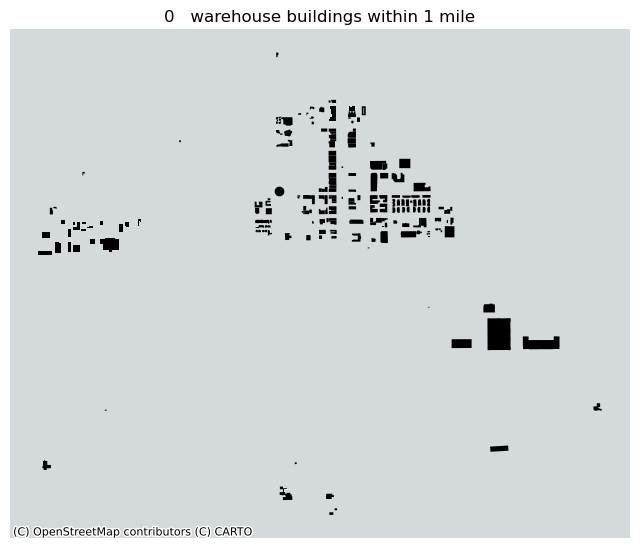

In [14]:
%%time 
# a "magic" function to display the time it took to run this cell
# run the function once
make_building_map('Ontario, East Emporia Street, Ontario, San Bernardino County, California, 91761, United States')

# Create isochrones

In [15]:
# import necessary library first
from shapely.geometry import Point, Polygon

## Download and prep the street network

In [16]:
# configure the place, network type, trip times, and travel speed
# latlon = [34.0633,-117.6509]
# address = 'Ontario International Airport, Vineyard Avenue, Racimo, Ontario, San Bernardino County, California, 91761, United States'

address ='Ontario, East Emporia Street, Ontario, San Bernardino County, California, 91761, United States'
network_type = 'walk'
distance = [402.336, 804.672, 1609.34] #in meters
meters_per_minute = 75 # travel distance per minute
cmap = 'plasma'
title = 'How many wareshouses are within 1 miles'

In [17]:
# download the street network
# Use OSMnx to create a graph of the street network within 1 miles of the address
G = ox.graph.graph_from_address(address, dist=1609.34,
                               network_type= network_type) 

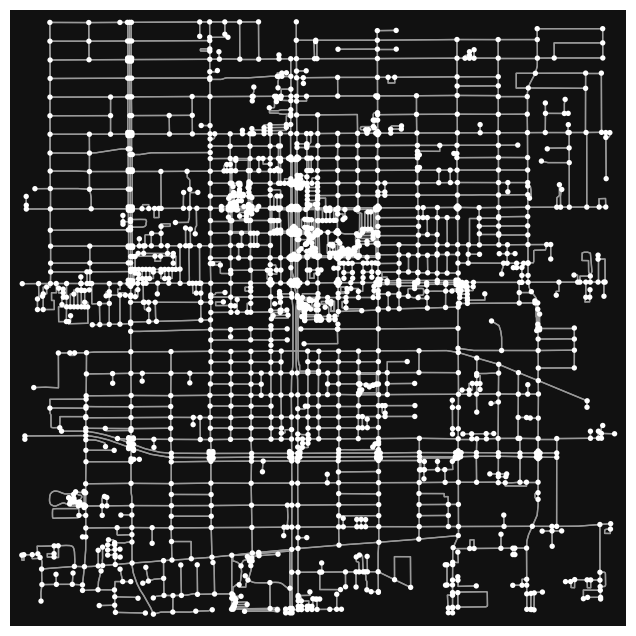

In [18]:
# quick plot using oxmnx
fig, ax = ox.plot_graph(G,figsize=(8,8))

Now we have all the nodes and walk streets within one mile from the adress 

### Project to web mercator

In [19]:
# project our network data to Web Mercator (measurements are in meters)
G = ox.project_graph(G, to_crs='epsg:3857')

## Convert edges and nodes to geodataframes

In [20]:
# convert nodes and edges to geodataframes
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

In [21]:
# Take a look at the dataframe
gdf_nodes.sample(5)

y             x highway  street_count         lon  \
osmid                                                                      
7771757318  4.035151e+06 -1.309581e+07     NaN             3 -117.641677   
6936064123  4.037653e+06 -1.309689e+07     NaN             4 -117.651323   
54492521    4.037562e+06 -1.309604e+07     NaN             4 -117.643710   
6935909266  4.037804e+06 -1.309682e+07     NaN             4 -117.650719   
6790080154  4.035615e+06 -1.309791e+07     NaN             3 -117.660557   

                  lat                           geometry  
osmid                                                     
7771757318  34.047268  POINT (-13095811.557 4035150.744)  
6936064123  34.065890  POINT (-13096885.401 4037652.932)  
54492521    34.065213  POINT (-13096037.926 4037561.836)  
6935909266  34.067015  POINT (-13096818.153 4037804.057)  
6790080154  34.050724  POINT (-13097913.325 4035615.096)

In [22]:
# Check the info of gdf_nodes
gdf_nodes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2117 entries, 54143599 to 10660778464
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   y             2117 non-null   float64 
 1   x             2117 non-null   float64 
 2   highway       160 non-null    object  
 3   street_count  2117 non-null   int64   
 4   lon           2117 non-null   float64 
 5   lat           2117 non-null   float64 
 6   geometry      2117 non-null   geometry
dtypes: float64(4), geometry(1), int64(1), object(1)
memory usage: 132.3+ KB


In [23]:
# Take a look at the dataframe
gdf_edges.sample(5)

osmid lanes                 name      highway  \
u          v          key                                                      
511624853  511624840  0      7495991     2  South Euclid Avenue      primary   
8678970904 8678970915 0    936645204   NaN                  NaN      service   
54734829   6437636000 0    158300465   NaN  North Berlyn Avenue  residential   
581849494  581849524  0     45656533   NaN                  NaN      service   
6776341594 6776341593 0    722418128   NaN                  NaN      service   

                           oneway reversed   length  \
u          v          key                             
511624853  511624840  0     False    False  120.073   
8678970904 8678970915 0     False    False   24.856   
54734829   6437636000 0     False    False   43.577   
581849494  581849524  0     False     True  108.083   
6776341594 6776341593 0     False     True   65.067   

                                                                    geometry  \
u          v          key                                                      
511624853  511624840  0    LINESTRING (-13096866.432 4036146.284, -130968...   
8678970904 8678970915 0    LINESTRING (-13096826.769 4036237.220, -130968...   
54734829   6437636000 0    LINESTRING (-13095509.859 4037686.218, -130955...   
581849494  581849524  0    LINESTRING (-13097133.220 4036795.916, -130970...   
6776341594 6776341593 0    LINESTRING (-13096945.781 4037240.716, -130968...   

                          service maxspeed    ref     access bridge junction  \
u          v          key                                                      
511624853  511624840  0       NaN   45 mph  CA 83        NaN    NaN      NaN   
8678970904 8678970915 0       NaN      NaN    NaN  customers    NaN      NaN   
54734829   6437636000 0       NaN      NaN    NaN        NaN    NaN      NaN   
581849494  581849524  0     alley      NaN    NaN        NaN    NaN      NaN   
6776341594 6776341593 0       NaN      NaN    NaN        NaN    NaN      NaN   

                          tunnel  
u          v          key         
511624853  511624840  0      NaN  
8678970904 8678970915 0      NaN  
54734829   6437636000 0      NaN  
581849494  581849524  0      NaN  
6776341594 6776341593 0      NaN

In [24]:
# Check the info of gdf_edges
gdf_edges.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 6282 entries, (54143599, 9800508487, 0) to (10660778464, 10660778463, 0)
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   osmid     6282 non-null   object  
 1   lanes     804 non-null    object  
 2   name      3212 non-null   object  
 3   highway   6282 non-null   object  
 4   oneway    6282 non-null   bool    
 5   reversed  6282 non-null   object  
 6   length    6282 non-null   float64 
 7   geometry  6282 non-null   geometry
 8   service   718 non-null    object  
 9   maxspeed  92 non-null     object  
 10  ref       208 non-null    object  
 11  access    92 non-null     object  
 12  bridge    6 non-null      object  
 13  junction  6 non-null      object  
 14  tunnel    6 non-null      object  
dtypes: bool(1), float64(1), geometry(1), object(12)
memory usage: 886.3+ KB


<AxesSubplot: >

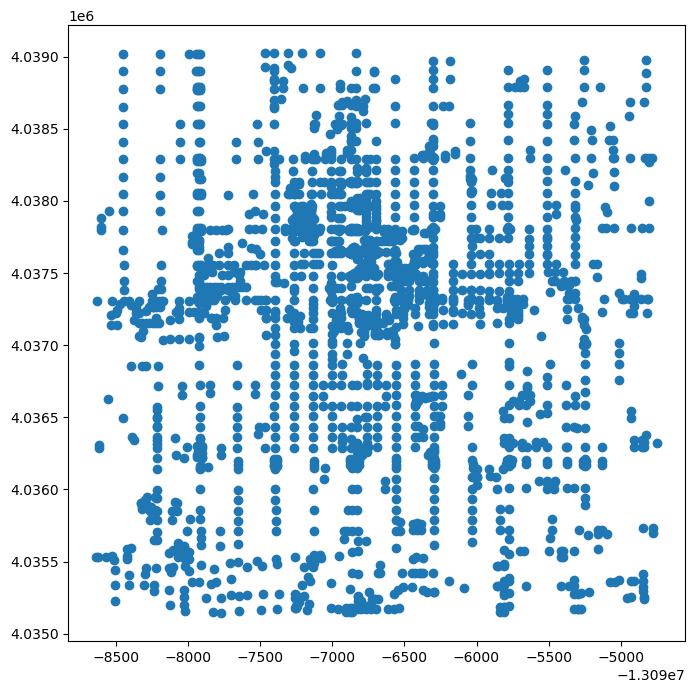

In [25]:
# Take a look at the simple plot of the nodes
gdf_nodes.plot(figsize=(8,8))

<AxesSubplot: >

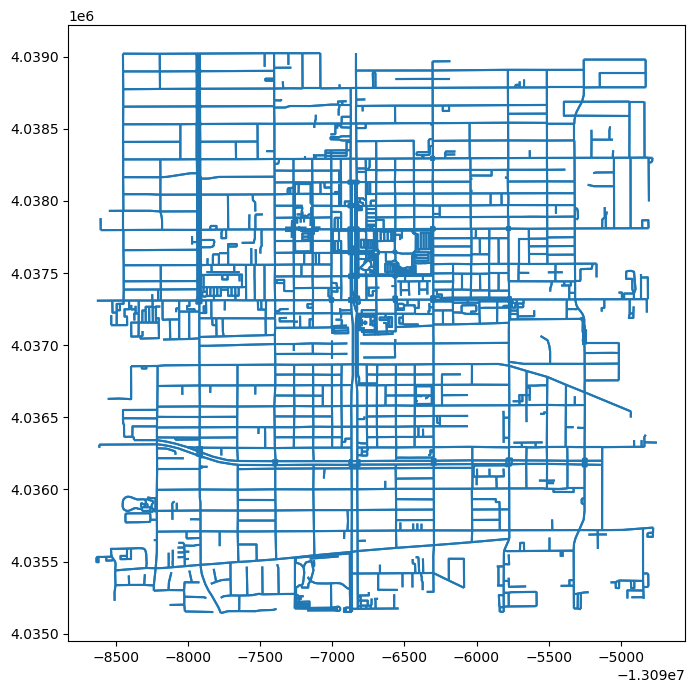

In [26]:
# Take a look at the simple plot of the streets
gdf_edges.plot(figsize=(8,8))

## Get the centroid

In [27]:
# get the bounding box coordinates
minx, miny, maxx, maxy = gdf_nodes.geometry.total_bounds
print(minx)
print(miny)
print(maxx)
print(maxy)

-13098634.987083703
4035142.253444819
-13094749.769875782
4039024.845405218


In [28]:
# calculate the centroid
centroid_x = (maxx-minx)/2 + minx
centroid_y = (maxy-miny)/2 + miny
print(centroid_x)
print(centroid_y)

-13096692.378479742
4037083.5494250185


## Get the nearest node to the lat/lon point

In [29]:
# use osmnx's distance.nearest_nodes command to get the id for the nearest node
center_node = ox.distance.nearest_nodes(G,Y=centroid_y,X=centroid_x)
print('The id for the nearest node is ' + str(center_node))

The id for the nearest node is 54853973


In [30]:
# what is this record?
center_point=gdf_nodes.loc[[center_node]]

In [31]:
# Take a look at 'center_point'
center_point

y             x highway  street_count         lon  \
osmid                                                                    
54853973  4.037093e+06 -1.309669e+07     NaN             3 -117.649584   

               lat                           geometry  
osmid                                                  
54853973  34.06172  POINT (-13096691.794 4037092.568)

## Map the network and building layers

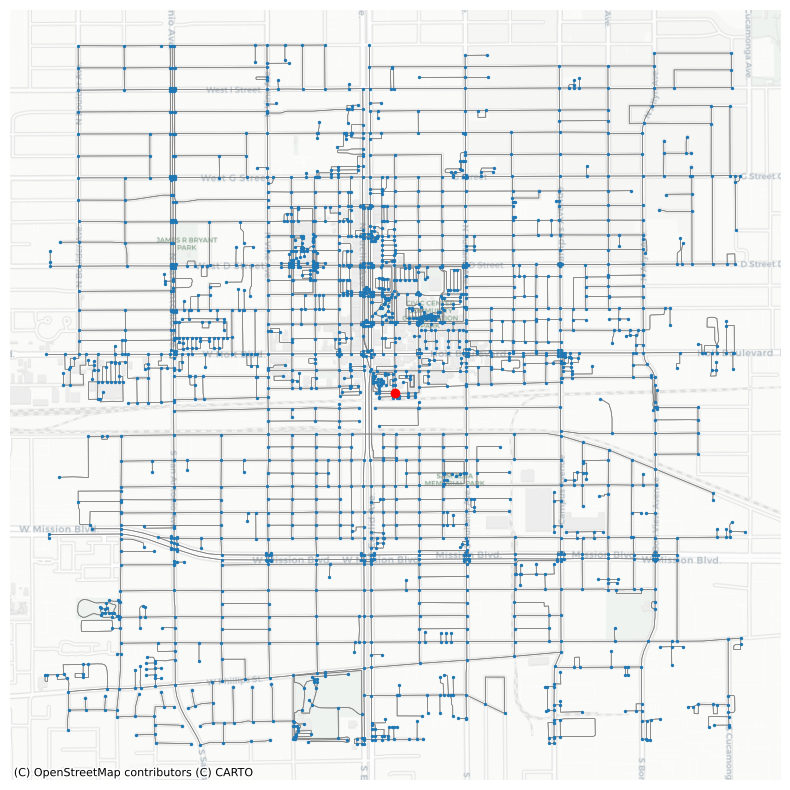

In [32]:
# set up the subplot (single plot = ax)
fig, ax = plt.subplots(figsize=(10,10))

# add the edges to ax
gdf_edges.plot(ax=ax,
              linewidth=0.5,
               edgecolor='gray', 
               zorder=10)

# add all nodes to ax
gdf_nodes.plot(ax=ax, 
              markersize=2, 
              zorder=20)

## The building data is too big to be imported
# create the map plot
# osm.plot(ax=ax,
        # column='building',
        # color='black')

# create the map plot
#osm[osm['building'] == 'warehouse'].plot(ax=ax,
#       column='building',
#      color='red')
## The building data is too big to be imported

# add the center node in red also to ax
gdf_nodes.loc[[center_node]].plot(ax=ax,
                                  color='r', 
                                  zorder=30)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

Now we have all the nodes and streets centered from the airport

## Choosing colors (cmap) for our isochrones

In [33]:
# choose a colormap
cmap = 'RdYlGn'

In [34]:
# assign a color hex code for each trip time isochrone
iso_colors = ox.plot.get_colors(n=len(distance), 
                                cmap=cmap, 
                                start=0, 
                                return_hex=True)
print(distance)
print(iso_colors)

[402.336, 804.672, 1609.34]
['#a50026', '#feffbe', '#006837']


In [35]:
# create a list of "zipped" time/colors
distance_color = list(zip(distance, iso_colors))
distance_color

[(402.336, '#a50026'), (804.672, '#feffbe'), (1609.34, '#006837')]

In [36]:
# loop through the list of time/colors
for distance,color in list(distance_color):
    print('The color for '+str(distance)+' meters is ' + color)

The color for 402.336 meters is #a50026
The color for 804.672 meters is #feffbe
The color for 1609.34 meters is #006837


## Color each node based on travel time from point of interest

In [37]:
# reverse the order so that outside nodes get associated first
distance_color.reverse()
# time_color.sort(reverse=True)
distance_color

[(1609.34, '#006837'), (804.672, '#feffbe'), (402.336, '#a50026')]

In [38]:
# loop through each trip time and associated color
for distance, color in list(distance_color):

    # for each trip time, create an egograph of nodes that fall within that distance
    subgraph = nx.ego_graph(G, center_node, radius=distance,distance="length")

    print('There are ' + str(len(subgraph.nodes())) + ' nodes within ' + str(distance) + ' meters ' + color)
    
    # for each of those nodes, update the gdf_nodes dataframe and assign it with its associated distance color
    for node in subgraph.nodes():
        gdf_nodes.loc[node,'distance'] = distance
        gdf_nodes.loc[node,'color'] = color


There are 1458 nodes within 1609.34 meters #006837
There are 536 nodes within 804.672 meters #feffbe
There are 122 nodes within 402.336 meters #a50026


In [39]:
# spot check
gdf_nodes.sample(5)

y             x   highway  street_count         lon  \
osmid                                                                         
6790080166   4.035517e+06 -1.309802e+07       NaN             3 -117.661547   
54701537     4.037443e+06 -1.309578e+07       NaN             3 -117.641362   
6790080154   4.035615e+06 -1.309791e+07       NaN             3 -117.660557   
581849478    4.037043e+06 -1.309799e+07       NaN             3 -117.661264   
10652353617  4.038530e+06 -1.309630e+07  crossing             3 -117.646096   

                   lat                           geometry  distance    color  
osmid                                                                         
6790080166   34.049991  POINT (-13098023.543 4035516.546)       NaN      NaN  
54701537     34.064331  POINT (-13095776.458 4037443.328)   1609.34  #006837  
6790080154   34.050724  POINT (-13097913.325 4035615.096)       NaN      NaN  
581849478    34.061351  POINT (-13097992.006 4037042.877)   1609.34  #006837  
10652353617  34.072415  POINT (-13096303.489 4038529.728)   1609.34  #006837

In [40]:
# the NaN values then need to be populated with a valid color
gdf_nodes['color'].fillna('#cccccc', inplace=True)

In [41]:
# another spot check: are all values in the color column populated?
gdf_nodes.sample(5)

y             x highway  street_count         lon  \
osmid                                                                      
6804914386  4.037309e+06 -1.309853e+07     NaN             3 -117.666057   
6057387107  4.037157e+06 -1.309834e+07     NaN             4 -117.664410   
6790080164  4.035531e+06 -1.309802e+07     NaN             3 -117.661550   
7980932536  4.036541e+06 -1.309493e+07     NaN             3 -117.633753   
1705264430  4.037804e+06 -1.309676e+07     NaN             4 -117.650231   

                  lat                           geometry  distance    color  
osmid                                                                        
6804914386  34.063331  POINT (-13098525.582 4037308.979)       NaN  #cccccc  
6057387107  34.062198  POINT (-13098342.239 4037156.759)       NaN  #cccccc  
6790080164  34.050100  POINT (-13098023.843 4035531.285)       NaN  #cccccc  
7980932536  34.057612  POINT (-13094929.506 4036540.509)       NaN  #cccccc  
1705264430  34.067015  POINT (-13096763.818 4037804.030)   804.672  #feffbe

<AxesSubplot: >

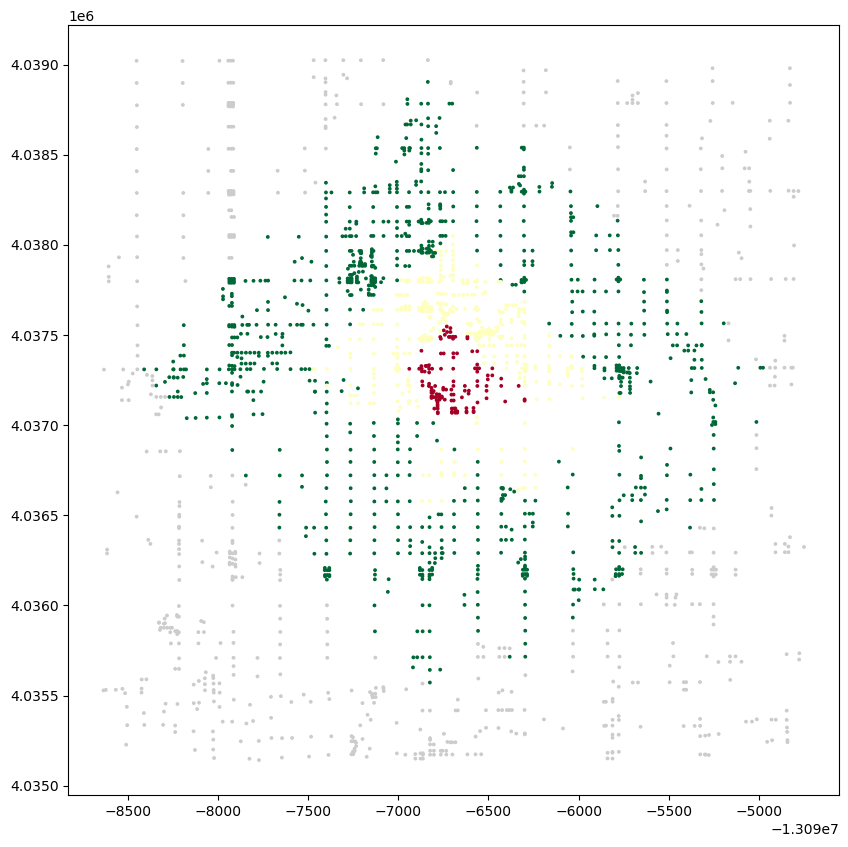

In [42]:
# map it
gdf_nodes.plot(figsize=(10,10),
               color=gdf_nodes['color'],
               markersize=3,
               legend=True
               )

Now we have the nodes within 1/4, 1/2, and 1 miles from the address

## Create polygons for each distance area

In [43]:
# put the 1/4 mile nodes in a variable
gdf_025 = gdf_nodes[gdf_nodes['distance']==402.336]

<AxesSubplot: >

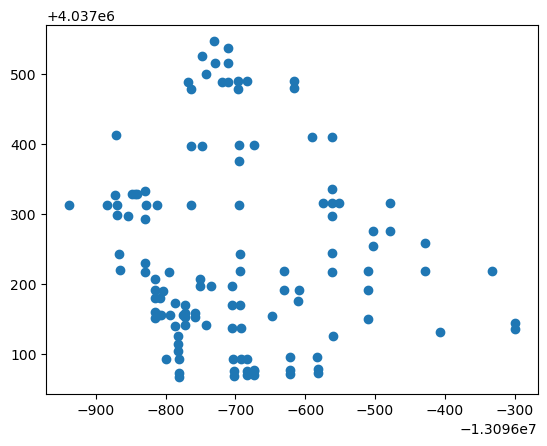

In [44]:
# plot it
gdf_025.plot()

Now we have the nodes within 1/4 miles of walk street.

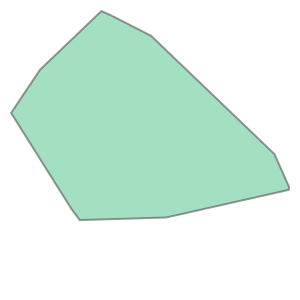

In [45]:
# combine all the points (unary_union) and create a convex hull polygon
gdf_025.unary_union.convex_hull

Now we have a convex hull polygon of 1/4 miles street networks from the center of walk street

## Dissolve to the rescue!

In [46]:
# dissolve the nodes by time
# adding the "time" argument creates a separate geometry (multipoint in this case) for each unique time category
isochrones = gdf_nodes.dissolve(by = "distance")
isochrones

geometry             y  \
distance                                                                    
402.336   MULTIPOINT (-13096938.834 4037312.701, -130968...  4.037313e+06   
804.672   MULTIPOINT (-13097469.505 4037311.075, -130974...  4.037316e+06   
1609.340  MULTIPOINT (-13098409.576 4037309.449, -130983...  4.037564e+06   

                     x          highway  street_count         lon        lat  \
distance                                                                       
402.336  -1.309683e+07  traffic_signals             5 -117.650814  34.063361   
804.672  -1.309630e+07  traffic_signals             4 -117.646062  34.063382   
1609.340 -1.309616e+07             stop             3 -117.644835  34.065225   

            color  
distance           
402.336   #a50026  
804.672   #feffbe  
1609.340  #006837

In [47]:
# for each row, create a convex hull
isochrones = isochrones.convex_hull.reset_index(name='geometry')
isochrones

distance                                           geometry
0   402.336  POLYGON ((-13096780.716 4037066.070, -13096800...
1   804.672  POLYGON ((-13096868.603 4036579.086, -13097396...
2  1609.340  POLYGON ((-13096824.810 4035572.545, -13096918...

In [48]:
# reverse the order so that outer polygon gets drawn first
isochrones.sort_values(by='distance', ascending=False,inplace=True)
isochrones

distance                                           geometry
2  1609.340  POLYGON ((-13096824.810 4035572.545, -13096918...
1   804.672  POLYGON ((-13096868.603 4036579.086, -13097396...
0   402.336  POLYGON ((-13096780.716 4037066.070, -13096800...

In [49]:
# reverse the colors too!
iso_colors.reverse()
iso_colors

['#006837', '#feffbe', '#a50026']

<AxesSubplot: >

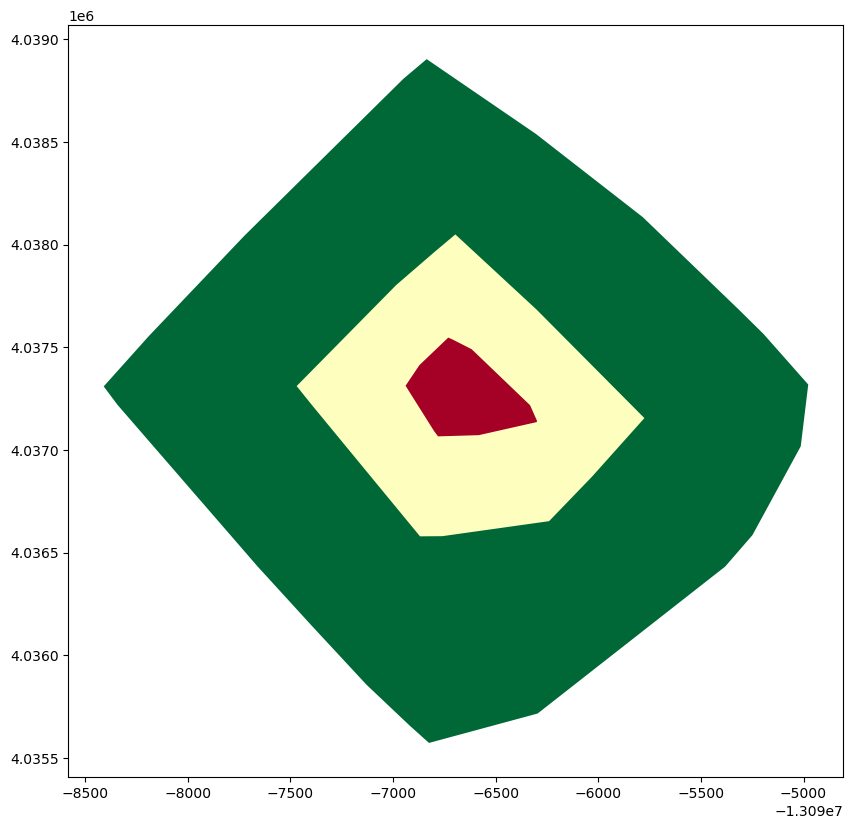

In [50]:
# Plot it!
isochrones.plot(figsize=(10,10),alpha=1,color=iso_colors, legend=True)

Now we have a convex hull polygon of 1/4, 1/2, 1 miles street networks from the center of walk street

## Create the buffer radius and color list
Create the buffer of 1, 1/2, and 1/4 mile. 

In [51]:
# Define the buffer radius (in meters)
buffer025 = 402.336
buffer05 = 804.672
buffer1 = 1609.34

In [52]:
# Create the buffer around the center point

buffer_025 = center_point.buffer(buffer025)
buffer_05 = center_point.buffer(buffer05)
buffer_1 = center_point.buffer(buffer1)

<AxesSubplot: >

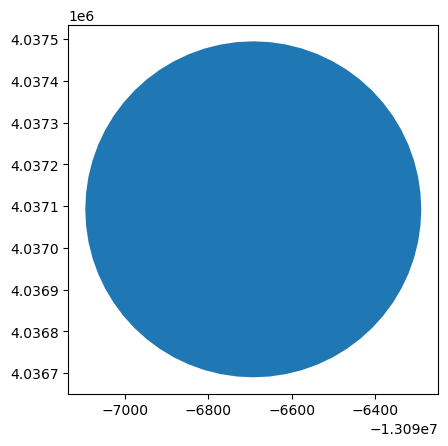

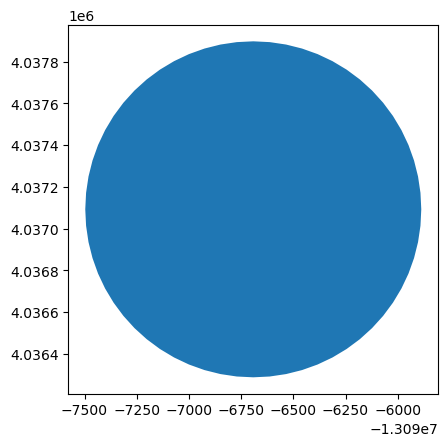

In [53]:
# Plot buffer_025
buffer_025.plot()

# Plot buffer_05
buffer_05.plot()

In [54]:
# Create a list of color for buffers
buffer_color = [(402.336, 'r'), (804.672, 'y'), (1609.34, 'g')]

## Bring the buffers together and add custom legend

In [55]:
# to draw custom legend elements, import these libraries
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

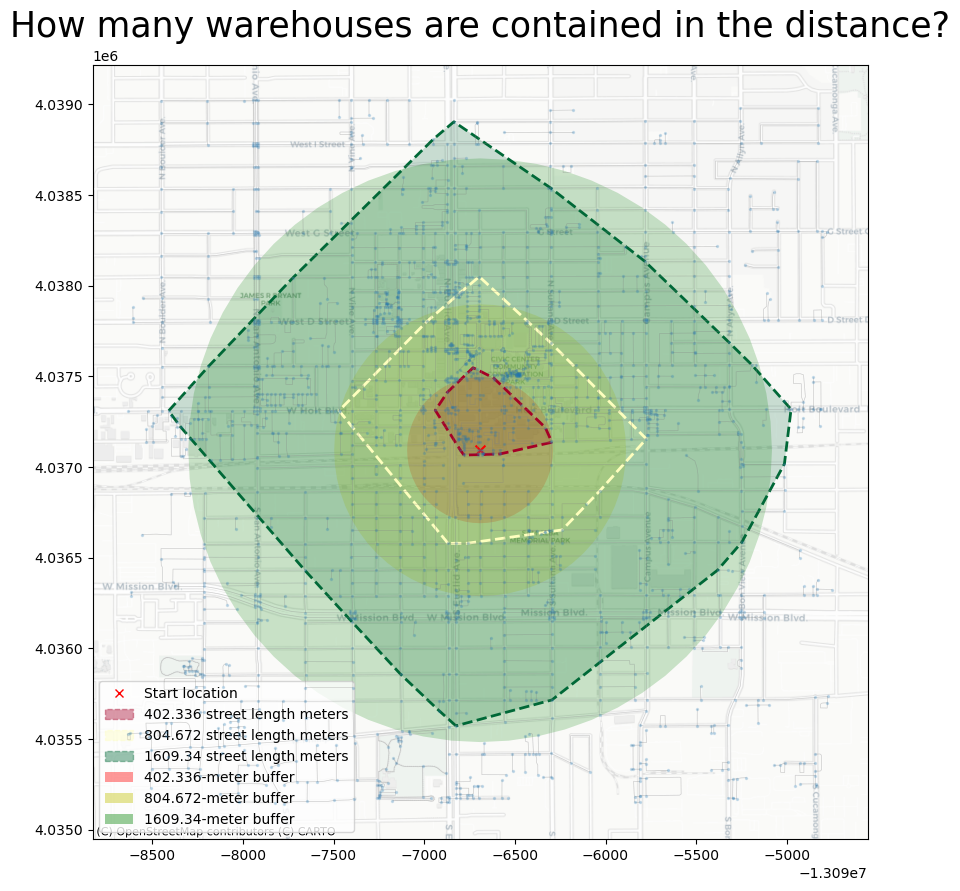

In [56]:
# set up the subplots
fig, ax = plt.subplots(figsize=(10,15))

# add the isochrone boundary
isochrones.boundary.plot(
    ax=ax,
    alpha=1,
    linestyle='--',
    color=iso_colors,
    lw=2
    ) 

# add the isochrones
isochrones.plot(
    ax=ax, 
    alpha=0.2, 
    categorical=True, # even though it is numeric, treat it as categorical
    color=iso_colors,
    )

# add the 1/4 mile buffer
buffer_025.plot(
    ax=ax, 
    alpha=0.2, 
    color='r'
    )

# add the 1/2 mile buffer
buffer_05.plot(
    ax=ax, 
    alpha=0.2, 
    color='y',
    )

# add the 1 mile buffer
buffer_1.plot(
    ax=ax, 
    alpha=0.2, 
    color='g'
    )

# add the center node in red
gdf_nodes.loc[[center_node]].plot(ax=ax,color='r',marker='x',markersize=50)


# build custom legend
legend_elements = [
    # add the center node to the legend
    Line2D([0], [0], marker='x', color='red', linestyle='',label='Start location', markersize=6)
    ]

# sort back to small time to large time
# time_color.sort(reverse=False)
distance_color.reverse()

# add the edges to ax
gdf_edges.plot(ax=ax,
              linewidth=0.5,
               edgecolor='gray', 
               zorder=10,
               alpha=0.2)

# add all nodes to ax
gdf_nodes.plot(ax=ax, 
              markersize=2, 
              zorder=20,
              alpha=0.2)

# loop through the list of distance/colors and add each to the legend
for distance,color in list(distance_color):
    legend_item = Patch(facecolor=color, edgecolor=color, linestyle='--',linewidth=1,label=str(distance)+' street length meters',alpha=0.4)
    legend_elements.append(legend_item)
    

for buffer,color in list(buffer_color):
    legend_item = Patch(facecolor=color,linewidth=1,label=str(buffer)+'-meter buffer',alpha=0.4)
    legend_elements.append(legend_item)


# add the legend
ax.legend(handles=legend_elements,loc='lower left')


# add a title
ax.set_title('How many warehouses are contained in the distance?',fontsize=25,pad=20)

# hide the axis
ax.axis('on')

# add the basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

The isochrones are created circle from the center. It is because there is no walk streets connect to the southern part of the center. 

## Bring in warehouse data

In [57]:
Warehouses = pd.read_csv('../weekly tasks/week 4/Warehouse Data Exploration - Matthews/Data/Warehouse_Data.csv',
        dtype=
        {
            'Assessor parcel number':str,
            'Building classification':str,
        }
)

San_Bern_Parcels = gpd.read_file('../weekly tasks/week 4/Warehouse Data Exploration - Matthews/Data/Ontario Parcels/SBCo_Parcel_Polygons.shp')

San_Bern_Parcels.rename(columns = {'ParcelNumb':'Assessor parcel number'}, inplace = True)

#merge the warehouses and parcel shapefile on the San Bernandino County Tax Assessor parcel Number
Warehouse_Parcel=Warehouses.merge(San_Bern_Parcels,on="Assessor parcel number")
Warehouse_Parcel_Geo = gpd.GeoDataFrame(Warehouse_Parcel, geometry='geometry')

In [58]:
# Check the wareshouse dataframe crs
Warehouse_Parcel_Geo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

/tmp/ipykernel_14861/2825910890.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Warehouse_Parcel_Geo.centroid.plot()


<AxesSubplot: >

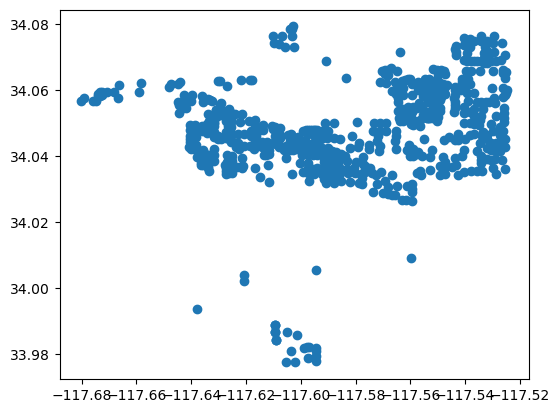

In [59]:
# Get the centroid of the warehouse and plot it
Warehouse_Parcel_Geo.centroid.plot()

In [60]:
# convert the warehouse data projection to crs="EPSG:3857"
warehouse = Warehouse_Parcel_Geo.to_crs(3857)
warehouse.head()

Assessor parcel number             Building classification  Year built  \
0              023812175              distribution warehouse        1996   
1              021126319  transit warehouse (truck terminal)        1992   
2              107311124              distribution warehouse        2021   
3              021121315                   storage warehouse        1992   
4              023808145              distribution warehouse        1980   

   Acres  Building sq.ft.  OBJECTID                     OwnerName   LandValue  \
0     93          2646053    157685  TOYOTA MOTOR SALES U S A INC  51,510,534   
1     70          1986082    123022  UPS WORLDWIDE FORWARDING INC  25,587,357   
2     62          1748594    685625               OLV PHASE II LP  65,790,000   
3     61          1723857    121965  UPS WORLDWIDE FORWARDING INC  24,185,220   
4     59          1681858    157834  COSTCO WHOLESALE CORPORATION  76,500,000   

    Improvemen PersonalPr  ...       ZoningDesc       Jurisdicti  \
0   30,864,960          0  ...  City of Ontario  City of Ontario   
1   54,634,664          0  ...  City of Ontario  City of Ontario   
2   75,500,000          0  ...  City of Ontario  City of Ontario   
3   24,451,343          0  ...  City of Ontario  City of Ontario   
4  147,900,000          0  ...  City of Ontario  City of Ontario   

                     Jurisdic_1 BaseYear PageMap  \
0  http://www.ci.ontario.ca.us/     1993  023812   
1  http://www.ci.ontario.ca.us/     1992  021126   
2  http://www.ci.ontario.ca.us/     2021  107311   
3  http://www.ci.ontario.ca.us/     1992  021121   
4  http://www.ci.ontario.ca.us/     2021  023808   

                           AssessDesc  AssessClas     Shape__Are   Shape__Len  \
0              DISTRIBUTION WAREHOUSE  COMMERCIAL  552237.437500  3009.581112   
1  TRANSIT WAREHOUSE (TRUCK TERMINAL)  INDUSTRIAL  414508.363281  2895.298085   
2              DISTRIBUTION WAREHOUSE  INDUSTRIAL  364429.617188  2738.202572   
3                   STORAGE WAREHOUSE  COMMERCIAL  359815.906250  2461.426213   
4              DISTRIBUTION WAREHOUSE  INDUSTRIAL  351134.007812  2355.939087   

                                            geometry  
0  POLYGON ((-13086492.105 4035247.813, -13086372...  
1  POLYGON ((-13088829.670 4035264.063, -13088826...  
2  POLYGON ((-13091884.273 4027506.374, -13091882...  
3  POLYGON ((-13089294.820 4035779.125, -13089177...  
4  POLYGON ((-13083700.960 4037200.053, -13083076...  

[5 rows x 26 columns]

## Create a function that generates a map contain buffers and warehouses based on any location

In [61]:
# configure the place, network type, trip times, and travel speed
def isomap(address):  
    address = address
    network_type = 'walk'
    distance = [402.336, 804.672, 1609.34] #in meters
    cmap = 'plasma'
    title = 'How many wareshouses are within 1,1/2,and 1/4 miles'
    
    
    # set up the subplots
    fig, ax = plt.subplots(figsize=(10,15))

    # add the isochrone boundary
    isochrones.boundary.plot(
        ax=ax,
        alpha=1,
        linestyle='--',
        color=iso_colors,
        lw=2
        ) 

    # add the isochrones
    isochrones.plot(
        ax=ax, 
        alpha=0.2, 
        categorical=True, # even though it is numeric, treat it as categorical
        color=iso_colors,
        )

    # add the 1/4 mile buffer
    buffer_025.plot(
        ax=ax, 
        alpha=0.2, 
        color='r'
        )

    # add the 1/2 mile buffer
    buffer_05.plot(
        ax=ax, 
        alpha=0.2, 
        color='y',
        )

    # add the 1 mile buffer
    buffer_1.plot(
        ax=ax, 
        alpha=0.2, 
        color='g'
        )

    # add the center node in red
    gdf_nodes.loc[[center_node]].plot(ax=ax,color='r',marker='x',markersize=50)


    # build custom legend
    legend_elements = [
        # add the center node to the legend
        Line2D([0], [0], marker='x', color='red', linestyle='',label='Start location', markersize=6)
        ]

    # sort back to small time to large time
    # time_color.sort(reverse=False)
    distance_color.reverse()


    # loop through the list of distance/colors and add each to the legend
    for distance,color in list(distance_color):
        legend_item = Patch(facecolor=color, edgecolor=color, linestyle='--',linewidth=1,label=str(distance)+' street length meters',alpha=0.4)
        legend_elements.append(legend_item)


    for buffer,color in list(buffer_color):
        legend_item = Patch(facecolor=color,linewidth=1,label=str(buffer)+'-meter buffer',alpha=0.4)
        legend_elements.append(legend_item)
        
    # add wareshouse location 
    warehouse.centroid.plot(ax=ax, color='red',markersize=2)


    # add the legend
    ax.legend(handles=legend_elements,loc='lower left')


    # add a title
    ax.set_title('How many warehouses are contained in the distance?',fontsize=25,pad=20)

    # hide the axis
    ax.axis('on')

    # add the basemap
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)
    

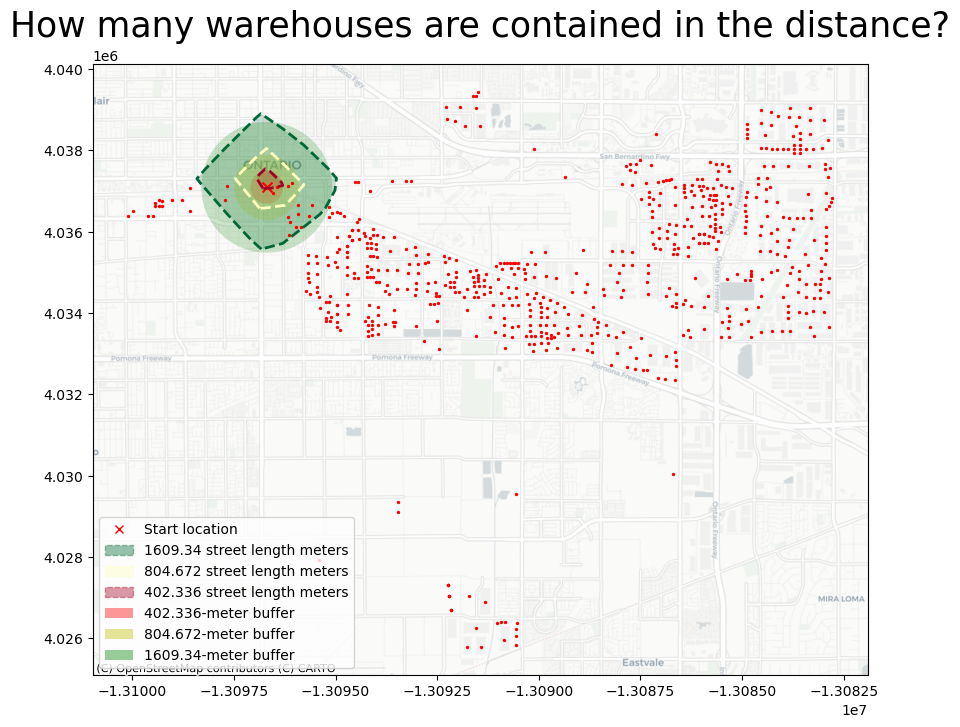

In [62]:
# Run the funtion
isomap('Ontario, San Bernardino County, CAL Fire Southern Region, California, 91761, United States')


Now we have a function showing all the warehouse location and the 1/4, 1/2, 1 mile-buffers and street length within 1/4, 1/2, 1 mile isomap from a specific address. Just type in any location to see their relation!